
# PCA Step-by-Step – Visualizing Variance via Rotation

This notebook illustrates **how PCA discovers the directions of maximum variance** by rotating views of the data in 3D. This helps us intuitively understand what PCA is doing when it selects principal components.

1. Generate 3D synthetic data
2. Visualize it from multiple angles
3. Apply PCA to identify the directions of maximum variance
4. Project it onto lower dimensions


In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
# Create 3D data
X, _ = make_classification(
    n_samples=300,
    n_features=3,
    n_informative=3,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=32
)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

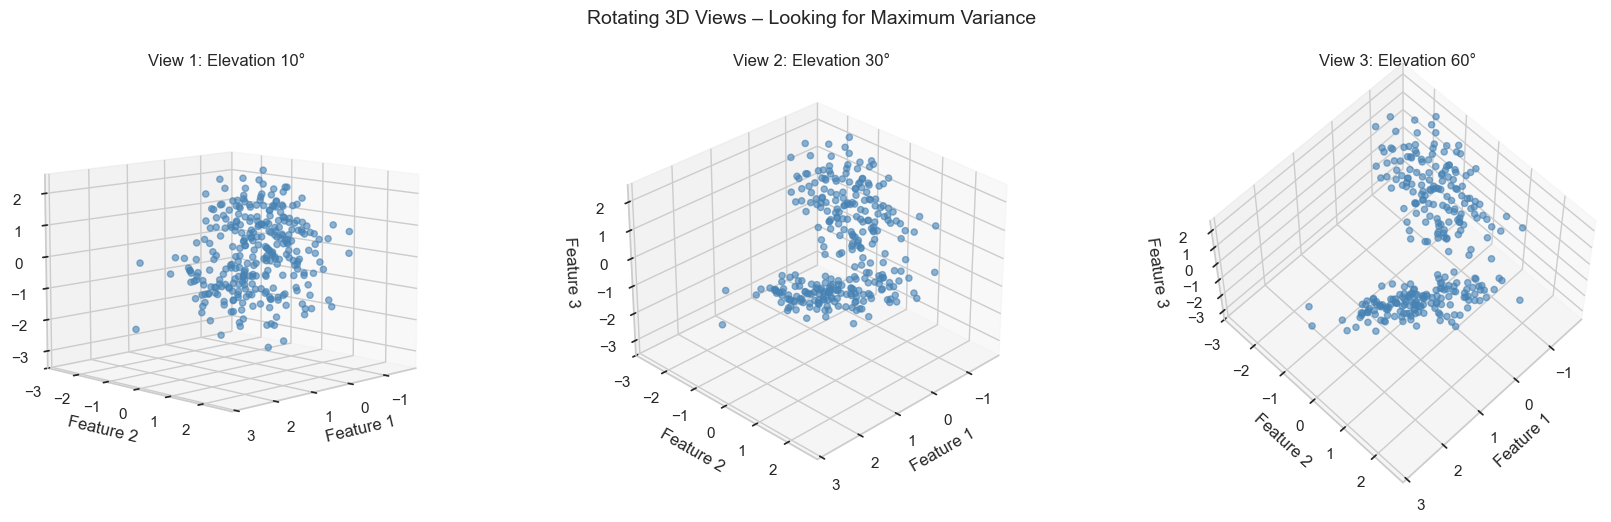

In [3]:
# Plot from multiple angles
fig = plt.figure(figsize=(18, 5))

for i, elev in enumerate([10, 30, 60]):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], alpha=0.6, c='steelblue')
    ax.view_init(elev=elev, azim=45)
    ax.set_title(f'View {i+1}: Elevation {elev}°')
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_zlabel("Feature 3")

plt.suptitle("Rotating 3D Views – Looking for Maximum Variance", fontsize=14)
plt.tight_layout()
plt.show()

In [4]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio (Importance of Each Principal Component):")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.2%}")

Explained Variance Ratio (Importance of Each Principal Component):
PC1: 63.48%
PC2: 19.87%


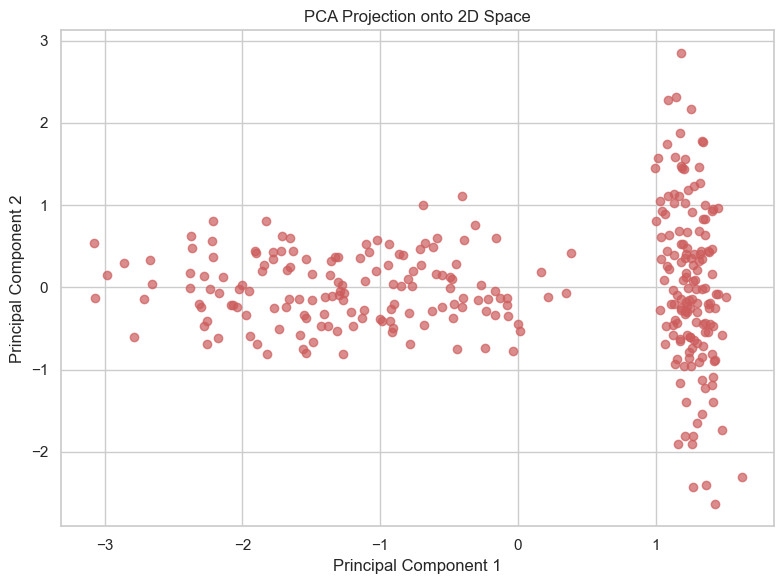

In [5]:
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, color='indianred')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection onto 2D Space')
plt.grid(True)
plt.tight_layout()
plt.show()

- By rotating the original 3D data, we could **visually inspect the structure** and identify where variance might be most significant.
- PCA does this computationally: it finds the **exact axes** where the variance is greatest (PC1, PC2, ...).
- These new axes form a **new coordinate system** where we can reduce dimensions with **minimal information loss**.

## Key Takeaways

| Step | What Happens |
|------|-------------------------------|
| Rotate views | See where data is most spread out |
| PCA fit | Finds axes of max variance mathematically |
| Project | Keep the axes that explain most of the data (e.g., PC1, PC2) |

This approach is especially useful for:
- Visualizing high-dimensional data
- Reducing noise or redundancy
- Preparing data for clustering or classification